In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace

In [3]:
conf = !python  parameters.py

In [4]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [5]:
## Experiment config
case="E1000"
configs.name="E1000v9"
configs.n_devices=999
configs.n_jobs=9

#log_ppo_E1000v9_w5050

In [6]:
train_log = pd.read_pickle('logs/log_ppo_' + str(configs.name) + '_w5050.pkl', 'infer')
edge_log = pd.read_pickle('logs/log_edge2_' +  str(case) + '_' + str(configs.n_jobs)+ '_' + str(configs.n_jobs)+  "_"+ str(configs.n_devices) +'.pkl', 'infer')
edge_log_cost = pd.read_pickle('logs/log_edge_PCost_' +  str(case) + '_' + str(configs.n_jobs)+ '_' + str(configs.n_jobs)+  "_"+ str(configs.n_devices) +'.pkl', 'infer')
rnd_log = pd.read_pickle('logs/log_rnd_' +  str(case) + '_' + str(configs.n_jobs)+   '_' + str(configs.n_jobs)+  "_"+ str(configs.n_devices) +'.pkl', 'infer')
train_log = np.array(train_log)
edge_log = np.array(edge_log)
edge_log_cost = np.array(edge_log_cost)
rnd_log = np.array(rnd_log)
#print(train_log.shape)
train_log = np.abs(train_log)
rnd_log = np.abs(rnd_log)
edge_log = np.abs(edge_log)
edge_log_cost = np.abs(edge_log_cost)

print(train_log[:1])

#[i_update, mean_rewards_all_env,v_loss,mean_all_init_rewards,init_times.mean(),time_all_env.mean(),init_costs.mean(),cost_all_env.mean()])

[[   0.         2111.7875       43.43549347 1074.75        529.5
  2563.19995117 1620.         1660.375     ]]


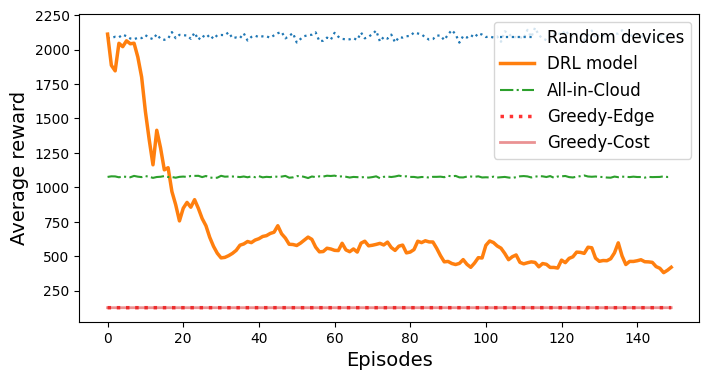

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(rnd_log[:,1],linewidth=1.6,linestyle=":",label="Random devices")
ax.plot(train_log[:,1],linewidth=2.5,label="DRL model")
ax.plot(train_log[:,3],linestyle="-.",label="All-in-Cloud")
ax.plot(edge_log[:,1],linewidth=2.5,linestyle="dotted",label="Greedy-Edge",alpha=0.8,color="red")
ax.plot(edge_log_cost[:,1],linewidth=2.,label="Greedy-Cost",alpha=0.5)

# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average reward', fontsize=14)
plt.savefig("images/reward_E1000v9_w5050.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

NameError: name 'train_log99' is not defined

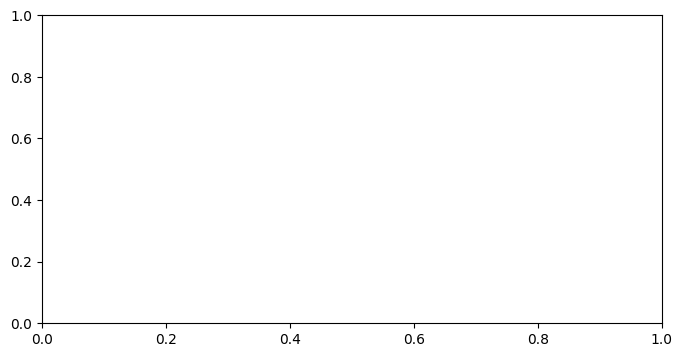

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (9x100)")
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (9x100)")

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (9x1000)")
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (9x1000)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [9]:
train_log99 = pd.read_pickle('trainlogs/log_ppo_train_9_99_3_20.pkl', 'infer')
train_log999 = pd.read_pickle('trainlogs/log_ppo_train_9_999_3_20.pkl', 'infer')
train_log99 = np.array(train_log99)
train_log999 = np.array(train_log999)
train_log999 = np.abs(train_log999)
train_log99 = np.abs(train_log99)

FileNotFoundError: [Errno 2] No such file or directory: 'trainlogs/log_ppo_train_9_99_3_20.pkl'

NameError: name 'train_log99' is not defined

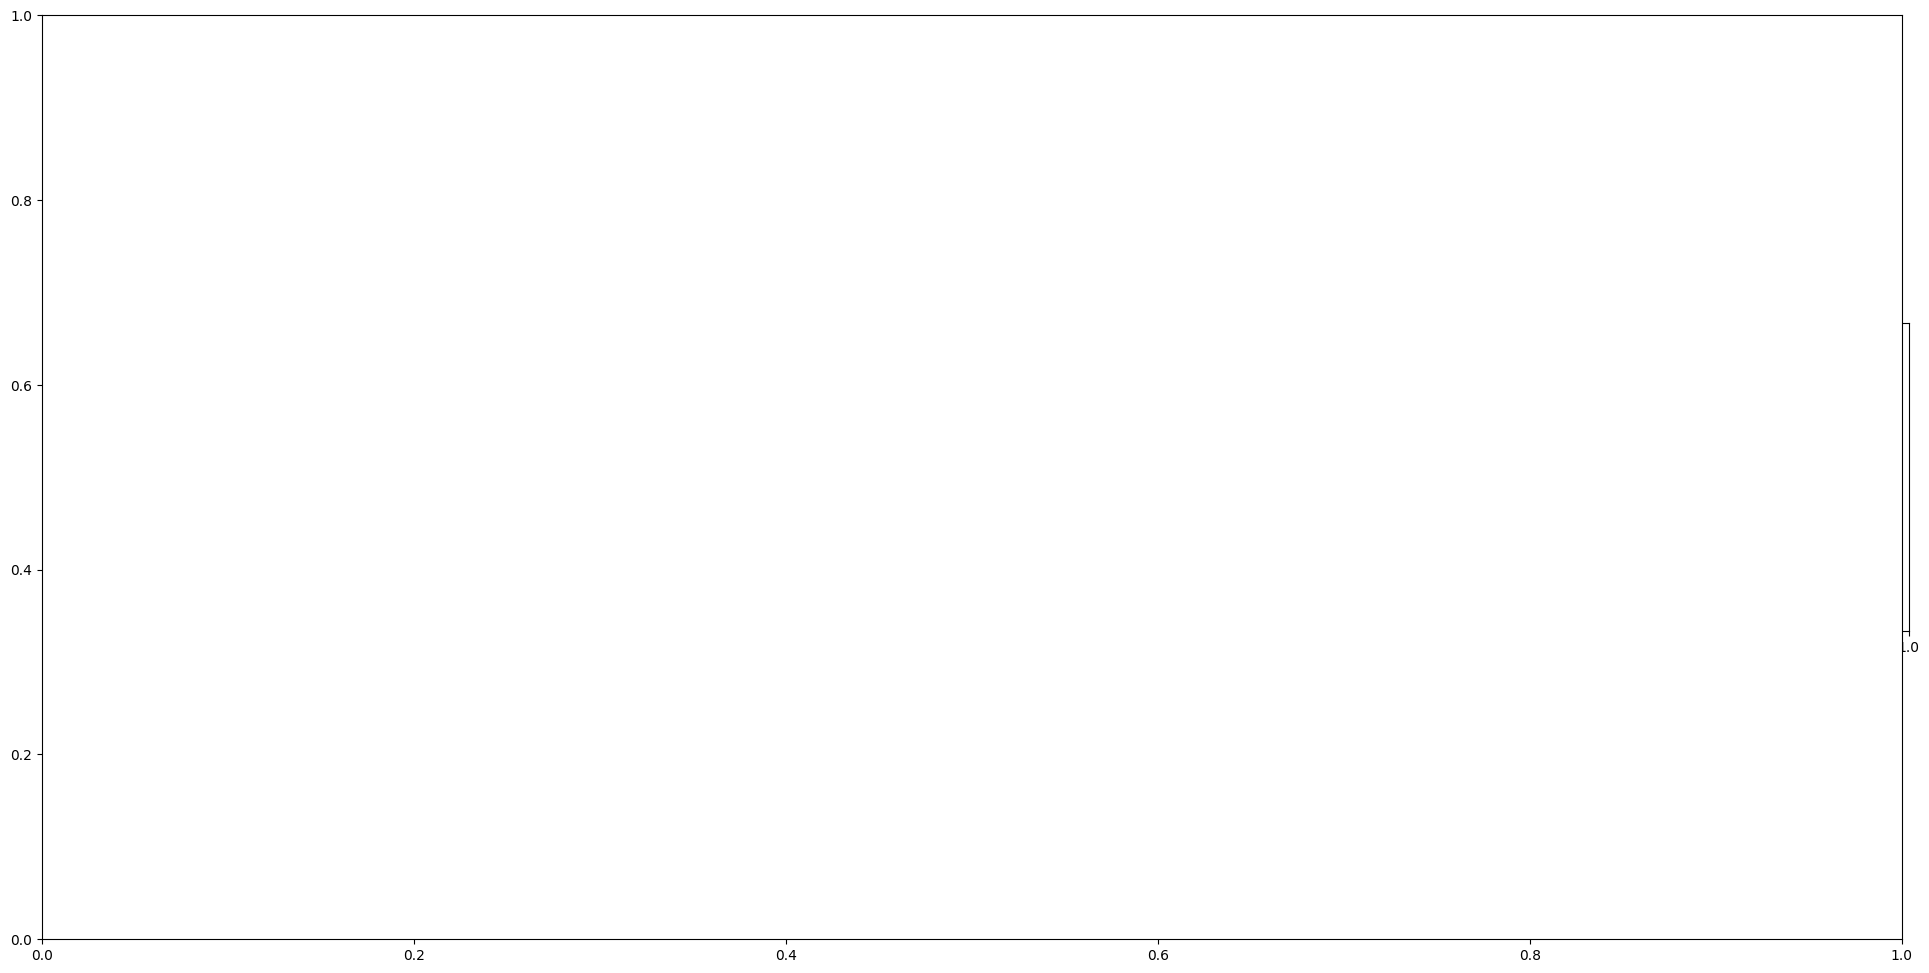

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig, ax = plt.subplots(figsize=(8,4))

axins1 = zoomed_inset_axes(ax, zoom = 3, loc='center right')
axins1.plot(train_log99[:,1],color='green',linewidth=2.5)
axins1.plot(train_log999[:,1],color='blue',linewidth=2.5)
axins1.plot(train_log99[:,-1],color='red',linestyle="-.")
axins1.plot(train_log999[:,-1],color='orange',linestyle="-.")
axins1.tick_params(labelleft=False, labelbottom=False)
#axins1.plot(y,datapts.T,'mo')
x1, x2, y1, y2 = 80,100,200,350 
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (81x100)",color='green')
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (81x100)",color='red')

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (81x1000)",color='blue')
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (81x1000)",color='orange')

mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5")
# plt.legend(title='Allocations',fontsize=14)
ax.legend(fontsize=12,ncol=2)
# plt.title('Job times',fontsize=16)
ax.set_xlabel('Episodes', fontsize=14)
ax.set_ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_81.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

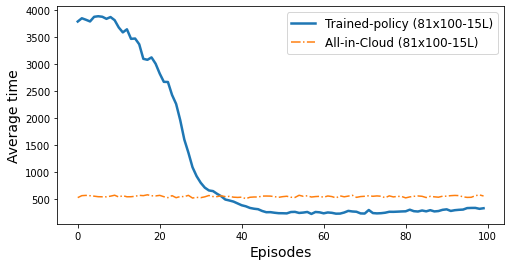

In [ ]:
train_log15 = pd.read_pickle('trainlogs/log_ppo_c15_train_9_99_3_20.pkl', 'infer')
train_log15 = np.array(train_log15)
train_log15 = np.abs(train_log15)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log15[:,1],linewidth=2.5,label="Trained-policy (81x100-15L)")
ax.plot(train_log15[:,-1],linestyle="-.",label="All-in-Cloud (81x100-15L)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_81_100_L15.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [11]:
train_log  = pd.read_pickle('logs/log_ppo_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/log_ppo_E1000v9_9_999.pkl'

In [12]:
train_log = np.array(train_log)
train_log[:5]

array([[0.00000000e+00, 2.11178750e+03, 4.34354935e+01, 1.07475000e+03,
        5.29500000e+02, 2.56319995e+03, 1.62000000e+03, 1.66037500e+03],
       [1.00000000e+00, 1.88507500e+03, 2.34550076e+01, 1.07912500e+03,
        5.38250000e+02, 2.37437500e+03, 1.62000000e+03, 1.39577502e+03],
       [2.00000000e+00, 1.84513750e+03, 5.81674671e+00, 1.07850000e+03,
        5.37000000e+02, 2.33100000e+03, 1.62000000e+03, 1.35927502e+03],
       [3.00000000e+00, 2.04530000e+03, 7.31672096e+00, 1.07225000e+03,
        5.24500000e+02, 2.52625000e+03, 1.62000000e+03, 1.56434998e+03],
       [4.00000000e+00, 2.02073750e+03, 5.41378260e+00, 1.07725000e+03,
        5.34500000e+02, 2.49662500e+03, 1.62000000e+03, 1.54484998e+03]])

In [13]:
reward = train_log[:,1]
initTime = train_log[:,4]
Time = train_log[:,5]
initCost = train_log[:,6]
Cost = train_log[:,7]
meanV = train_log[:,2]

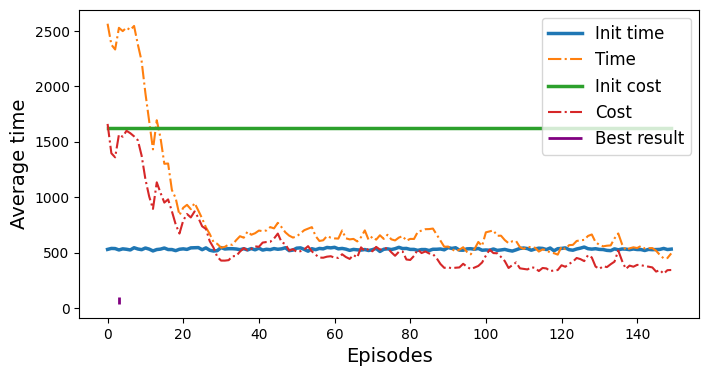

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(initTime,linewidth=2.5,label="Init time")
ax.plot(Time,linestyle="-.",label="Time")

ax.plot(initCost,linewidth=2.5,label="Init cost")
ax.plot(Cost,linestyle="-.",label="Cost")

vx = meanV.min()
ax.vlines(x=vx, ymin=40, ymax=100, colors='purple', ls='-', lw=2, label='Best result')
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
# plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()